Installing necessary packages:

```Julia
using Pkg

Pkg.add(["DataFrames", "Statistics", "CSV", "Plots", "StatsPlots"])
```

In [41]:
using DataFrames, Statistics, CSV, Plots, StatsPlots

In [42]:
df = CSV.read(pwd() * "/data_raw/init_res.csv", DataFrame)

describe(df)

10×7 DataFrame
 Row │ variable                       mean       min      median          max  ⋯
     │ Symbol                         Float64    Float64  Float64         Floa ⋯
─────┼──────────────────────────────────────────────────────────────────────────
   1 │ actual                         1.57611e7  618.0    354958.0        9.37 ⋯
   2 │ expected                       1.57604e7  582.652       3.55792e5  9.37
   3 │ glm_est                        1.57724e7  640.196       3.52512e5  9.37
   4 │ ols_est                        1.57718e7  601.937       3.5178e5   9.37
   5 │ expected_est                   2.72258e5  646.569       2.89695e5  9.24 ⋯
   6 │ expected_est_better            1.19835e7  647.684       4.08845e5  1.61
   7 │ actual_est                     1.19835e7  645.354       4.08984e5  1.61
   8 │ expected_est_bad_prior         1.57714e7  500.085       3.54172e5  9.37
   9 │ expected_est_better_bad_prior  1.57716e7  500.913       3.54184e5  9.37 ⋯
  10 │ actual_est_bad_prior           1.57717e7  507.43        3.54153e5  9.37
                                                               3 columns omitted

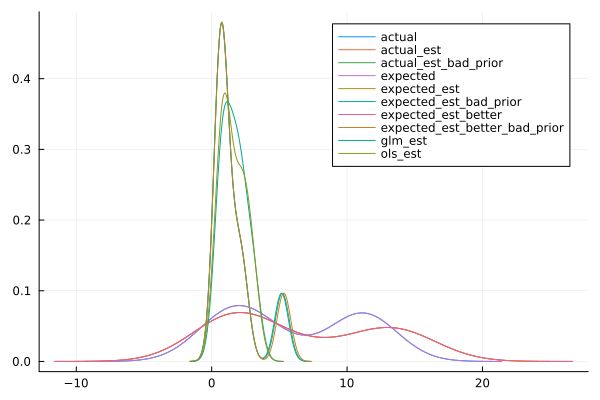

In [43]:
df_plot = stack(df, 1:10)
df_plot = df_plot[df_plot[:, :value] .< 1.5e4, :]

density(df_plot[:, :value] / 1000, group = df_plot[:, :variable])

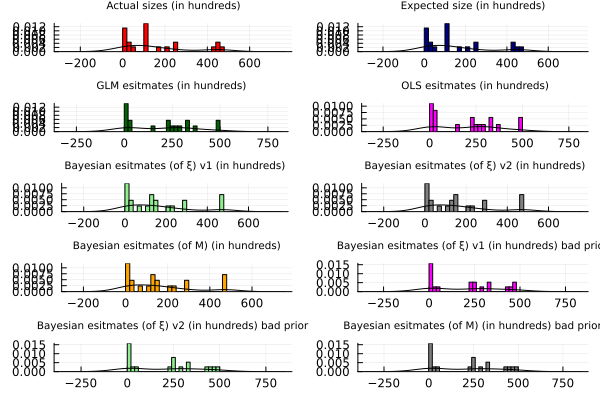

In [44]:
p1  = histogram(df[df[:, 1] .< 5e4, 1] / 100, normalize = true, legend = false, colour = :red, title = "Actual sizes (in hundreds)", titlefontsize = 7, bins = 30)
density!(df[df[:, 1] .< 5e4, 1] / 100, legend = false, colour = :black)

p2  = histogram(df[df[:, 2] .< 5e4, 2] / 100, normalize = true, legend = false, title = "Expected size (in hundreds)", colour = :navy, titlefontsize = 7, bins = 30)
density!(df[df[:, 2] .< 5e4, 2] / 100, legend = false, colour = :black)

p3  = histogram(df[df[:, 3] .< 5e4, 3] / 100, normalize = true, legend = false, title = "GLM esitmates (in hundreds)", colour = :darkgreen, titlefontsize = 7, bins = 30)
density!(df[df[:, 3] .< 5e4, 3] / 100, legend = false, colour = :black)

p4  = histogram(df[df[:, 4] .< 5e4, 4] / 100, normalize = true, legend = false, title = "OLS esitmates (in hundreds)", colour = :magenta, titlefontsize = 7, bins = 30)
density!(df[df[:, 4] .< 5e4, 4] / 100, legend = false, colour = :black)

p5  = histogram(df[df[:, 5] .< 5e4, 5] / 100, normalize = true, legend = false, title = "Bayesian esitmates (of ξ) v1 (in hundreds)", colour = :lightgreen, titlefontsize = 7, bins = 30)
density!(df[df[:, 5] .< 5e4, 5] / 100, legend = false, colour = :black)

p6  = histogram(df[df[:, 6] .< 5e4, 6] / 100, normalize = true, legend = false, title = "Bayesian esitmates (of ξ) v2 (in hundreds)", colour = :gray, titlefontsize = 7, bins = 30)
density!(df[df[:, 6] .< 5e4, 6] / 100, legend = false, colour = :black)

p7  = histogram(df[df[:, 7] .< 5e4, 7] / 100, normalize = true, legend = false, title = "Bayesian esitmates (of M) (in hundreds)", colour = :orange, titlefontsize = 7, bins = 30)
density!(df[df[:, 7] .< 5e4, 7] / 100, legend = false, colour = :black)

p8  = histogram(df[df[:, 8] .< 5e4, 8] / 100, normalize = true, legend = false, title = "Bayesian esitmates (of ξ) v1 (in hundreds) bad prior", colour = :magenta, titlefontsize = 7, bins = 30)
density!(df[df[:, 8] .< 5e4, 8] / 100, legend = false, colour = :black)

p9  = histogram(df[df[:, 9] .< 5e4, 9] / 100, normalize = true, legend = false, title = "Bayesian esitmates (of ξ) v2 (in hundreds) bad prior", colour = :lightgreen, titlefontsize = 7, bins = 30)
density!(df[df[:, 9] .< 5e4, 9] / 100, legend = false, colour = :black)

p10 = histogram(df[df[:,10] .< 5e4,10] / 100, normalize = true, legend = false, title = "Bayesian esitmates (of M) (in hundreds) bad prior", colour = :gray, titlefontsize = 7, bins = 30)
density!(df[df[:,10] .< 5e4,10] / 100, legend = false, colour = :black)

plot(
    layout = [2, 2, 2, 2, 2],
    p1, p2, p3, p4, p5, p6, p7, p8, p9, p10
)

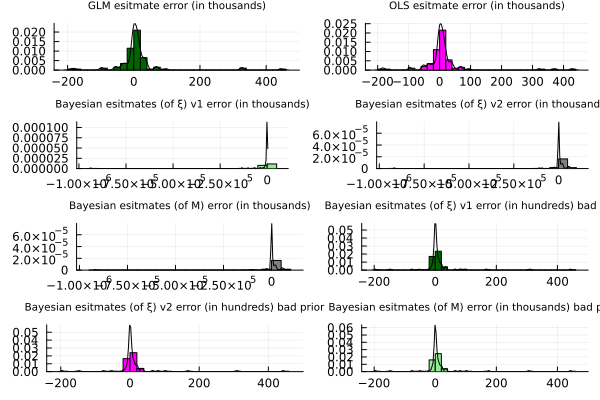

In [45]:
p1 = histogram((df[:, 3] - df[:, 1]) / 1000, normalize = true, legend = false, title = "GLM esitmate error (in thousands)", colour = :darkgreen, titlefontsize = 7, bins = 30)
density!((df[:, 3] - df[:, 1]) / 1000, legend = false, colour = :black)

p2 = histogram((df[:, 4] - df[:, 1]) / 1000, normalize = true, legend = false, title = "OLS esitmate error (in thousands)", colour = :magenta, titlefontsize = 7, bins = 30)
density!((df[:, 4] - df[:, 1]) / 1000, legend = false, colour = :black)

p3 = histogram((df[:, 5] - df[:, 1]) / 1000, normalize = true, legend = false, title = "Bayesian esitmates (of ξ) v1 error (in thousands)", colour = :lightgreen, titlefontsize = 7, bins = 30)
density!((df[:, 5] - df[:, 1]) / 1000, legend = false, colour = :black)

p4 = histogram((df[:, 6] - df[:, 1]) / 1000, normalize = true, legend = false, title = "Bayesian esitmates (of ξ) v2 error (in thousands)", colour = :gray, titlefontsize = 7, bins = 30)
density!((df[:, 6] - df[:, 1]) / 1000, legend = false, colour = :black)

p5 = histogram((df[:, 7] - df[:, 1]) / 1000, normalize = true, legend = false, title = "Bayesian esitmates (of M) error (in thousands)", colour = :gray, titlefontsize = 7, bins = 30)
density!((df[:, 7] - df[:, 1]) / 1000, legend = false, colour = :black)

p6 = histogram((df[:, 8] - df[:, 1]) / 1000, normalize = true, legend = false, title = "Bayesian esitmates (of ξ) v1 error (in hundreds) bad prior", colour = :darkgreen, titlefontsize = 7, bins = 30)
density!((df[:, 8] - df[:, 1]) / 1000, legend = false, colour = :black)

p7 = histogram((df[:, 9] - df[:, 1]) / 1000, normalize = true, legend = false, title = "Bayesian esitmates (of ξ) v2 error (in hundreds) bad prior", colour = :magenta, titlefontsize = 7, bins = 30)
density!((df[:, 9] - df[:, 1]) / 1000, legend = false, colour = :black)

p8 = histogram((df[:,10] - df[:, 1]) / 1000, normalize = true, legend = false, title = "Bayesian esitmates (of M) error (in thousands) bad prior", colour = :lightgreen, titlefontsize = 7, bins = 30)
density!((df[:,10] - df[:, 1]) / 1000, legend = false, colour = :black)

plot(
    p1, p2, p3, p4, p5, p6, p7, p8, 
    layout = [2, 2, 2, 2]
)

### Higher population counts

In [46]:
df = CSV.read(pwd() * "/data_raw/init_res_1.csv", DataFrame)

describe(df)

10×7 DataFrame
 Row │ variable                       mean       min       median          max ⋯
     │ Symbol                         Float64    Float64   Float64         Flo ⋯
─────┼──────────────────────────────────────────────────────────────────────────
   1 │ actual                         2.15606e7  371.0     528770.0            ⋯
   2 │ expected                       2.15609e7  355.536        5.27528e5
   3 │ glm_est                        2.15765e7   97.6248       5.09981e5
   4 │ ols_est                        2.15759e7   94.0068       5.09053e5
   5 │ expected_est                   2.54975e5  374.828        3.26216e5  512 ⋯
   6 │ expected_est_better            3.93233e7  375.473        2.45891e7
   7 │ actual_est                     3.93233e7  383.914        2.4589e7
   8 │ expected_est_bad_prior         2.15778e7  202.92         5.21789e5
   9 │ expected_est_better_bad_prior  2.15786e7  216.602        5.222e5        ⋯
  10 │ actual_est_bad_prior           2.15787e7  208.096        5.22187e5
                                                               3 columns omitted

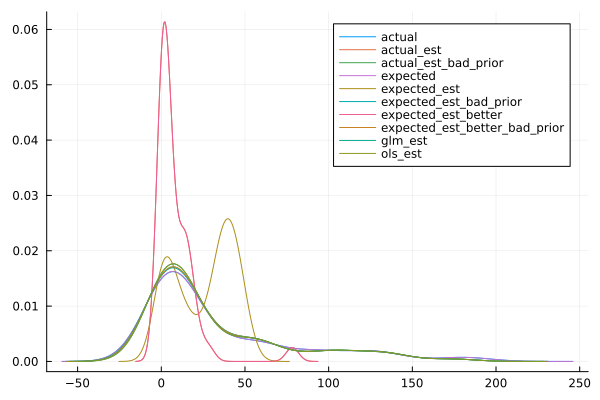

In [47]:
df_plot = stack(df, 1:10)
df_plot = df_plot[df_plot[:, :value] .< 2e6, :]

density(df_plot[:, :value] / 10000, group = df_plot[:, :variable])

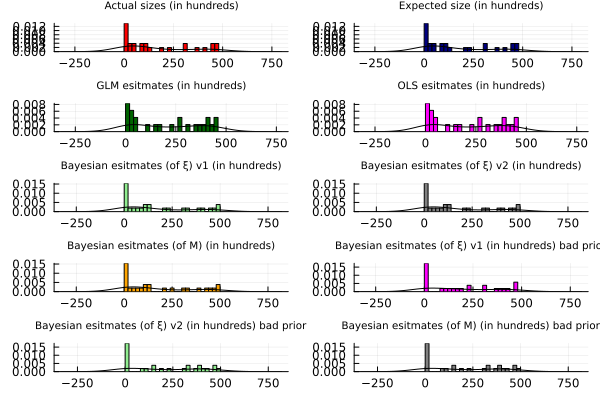

In [48]:
p1  = histogram(df[df[:, 1] .< 5e4, 1] / 100, normalize = true, legend = false, colour = :red, title = "Actual sizes (in hundreds)", titlefontsize = 7, bins = 30)
density!(df[df[:, 1] .< 5e4, 1] / 100, legend = false, colour = :black)

p2  = histogram(df[df[:, 2] .< 5e4, 2] / 100, normalize = true, legend = false, title = "Expected size (in hundreds)", colour = :navy, titlefontsize = 7, bins = 30)
density!(df[df[:, 2] .< 5e4, 2] / 100, legend = false, colour = :black)

p3  = histogram(df[df[:, 3] .< 5e4, 3] / 100, normalize = true, legend = false, title = "GLM esitmates (in hundreds)", colour = :darkgreen, titlefontsize = 7, bins = 30)
density!(df[df[:, 3] .< 5e4, 3] / 100, legend = false, colour = :black)

p4  = histogram(df[df[:, 4] .< 5e4, 4] / 100, normalize = true, legend = false, title = "OLS esitmates (in hundreds)", colour = :magenta, titlefontsize = 7, bins = 30)
density!(df[df[:, 4] .< 5e4, 4] / 100, legend = false, colour = :black)

p5  = histogram(df[df[:, 5] .< 5e4, 5] / 100, normalize = true, legend = false, title = "Bayesian esitmates (of ξ) v1 (in hundreds)", colour = :lightgreen, titlefontsize = 7, bins = 30)
density!(df[df[:, 5] .< 5e4, 5] / 100, legend = false, colour = :black)

p6  = histogram(df[df[:, 6] .< 5e4, 6] / 100, normalize = true, legend = false, title = "Bayesian esitmates (of ξ) v2 (in hundreds)", colour = :gray, titlefontsize = 7, bins = 30)
density!(df[df[:, 6] .< 5e4, 6] / 100, legend = false, colour = :black)

p7  = histogram(df[df[:, 7] .< 5e4, 7] / 100, normalize = true, legend = false, title = "Bayesian esitmates (of M) (in hundreds)", colour = :orange, titlefontsize = 7, bins = 30)
density!(df[df[:, 7] .< 5e4, 7] / 100, legend = false, colour = :black)

p8  = histogram(df[df[:, 8] .< 5e4, 8] / 100, normalize = true, legend = false, title = "Bayesian esitmates (of ξ) v1 (in hundreds) bad prior", colour = :magenta, titlefontsize = 7, bins = 30)
density!(df[df[:, 8] .< 5e4, 8] / 100, legend = false, colour = :black)

p9  = histogram(df[df[:, 9] .< 5e4, 9] / 100, normalize = true, legend = false, title = "Bayesian esitmates (of ξ) v2 (in hundreds) bad prior", colour = :lightgreen, titlefontsize = 7, bins = 30)
density!(df[df[:, 9] .< 5e4, 9] / 100, legend = false, colour = :black)

p10 = histogram(df[df[:,10] .< 5e4,10] / 100, normalize = true, legend = false, title = "Bayesian esitmates (of M) (in hundreds) bad prior", colour = :gray, titlefontsize = 7, bins = 30)
density!(df[df[:,10] .< 5e4,10] / 100, legend = false, colour = :black)

plot(
    layout = [2, 2, 2, 2, 2],
    p1, p2, p3, p4, p5, p6, p7, p8, p9, p10
)

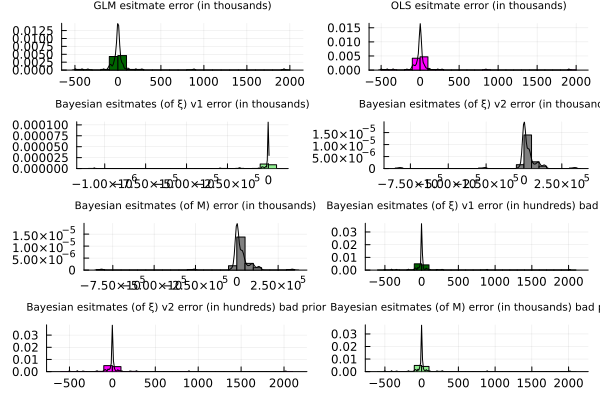

In [49]:
p1 = histogram((df[:, 3] - df[:, 1]) / 1000, normalize = true, legend = false, title = "GLM esitmate error (in thousands)", colour = :darkgreen, titlefontsize = 7, bins = 30)
density!((df[:, 3] - df[:, 1]) / 1000, legend = false, colour = :black)

p2 = histogram((df[:, 4] - df[:, 1]) / 1000, normalize = true, legend = false, title = "OLS esitmate error (in thousands)", colour = :magenta, titlefontsize = 7, bins = 30)
density!((df[:, 4] - df[:, 1]) / 1000, legend = false, colour = :black)

p3 = histogram((df[:, 5] - df[:, 1]) / 1000, normalize = true, legend = false, title = "Bayesian esitmates (of ξ) v1 error (in thousands)", colour = :lightgreen, titlefontsize = 7, bins = 30)
density!((df[:, 5] - df[:, 1]) / 1000, legend = false, colour = :black)

p4 = histogram((df[:, 6] - df[:, 1]) / 1000, normalize = true, legend = false, title = "Bayesian esitmates (of ξ) v2 error (in thousands)", colour = :gray, titlefontsize = 7, bins = 30)
density!((df[:, 6] - df[:, 1]) / 1000, legend = false, colour = :black)

p5 = histogram((df[:, 7] - df[:, 1]) / 1000, normalize = true, legend = false, title = "Bayesian esitmates (of M) error (in thousands)", colour = :gray, titlefontsize = 7, bins = 30)
density!((df[:, 7] - df[:, 1]) / 1000, legend = false, colour = :black)

p6 = histogram((df[:, 8] - df[:, 1]) / 1000, normalize = true, legend = false, title = "Bayesian esitmates (of ξ) v1 error (in hundreds) bad prior", colour = :darkgreen, titlefontsize = 7, bins = 30)
density!((df[:, 8] - df[:, 1]) / 1000, legend = false, colour = :black)

p7 = histogram((df[:, 9] - df[:, 1]) / 1000, normalize = true, legend = false, title = "Bayesian esitmates (of ξ) v2 error (in hundreds) bad prior", colour = :magenta, titlefontsize = 7, bins = 30)
density!((df[:, 9] - df[:, 1]) / 1000, legend = false, colour = :black)

p8 = histogram((df[:,10] - df[:, 1]) / 1000, normalize = true, legend = false, title = "Bayesian esitmates (of M) error (in thousands) bad prior", colour = :lightgreen, titlefontsize = 7, bins = 30)
density!((df[:,10] - df[:, 1]) / 1000, legend = false, colour = :black)

plot(
    p1, p2, p3, p4, p5, p6, p7, p8, 
    layout = [2, 2, 2, 2]
)

## Gamma prior results

In [50]:
df = CSV.read(pwd() * "/data_raw/gamma_res.csv", DataFrame)

describe(df)

10×7 DataFrame
 Row │ variable                       mean     min      median   max           ⋯
     │ Symbol                         Float64  Float64  Union…   Float64       ⋯
─────┼──────────────────────────────────────────────────────────────────────────
   1 │ actual                         5843.86  188.0    2257.5   109289.0      ⋯
   2 │ expected                       5849.84  173.649  2277.35       1.09283e
   3 │ glm_est                         NaN     NaN                  NaN
   4 │ ols_est                         NaN     NaN                  NaN
   5 │ expected_est                   6097.22  178.736  2361.75       1.17721e ⋯
   6 │ expected_est_better            6144.98  182.157  2363.52       1.17923e
   7 │ actual_est                     6149.57  194.506  2402.03       1.18056e
   8 │ expected_est_bad_prior          NaN     NaN                  NaN
   9 │ expected_est_better_bad_prior   NaN     NaN                  NaN        ⋯
  10 │ actual_est_bad_prior            NaN     NaN                  NaN
                                                               3 columns omitted

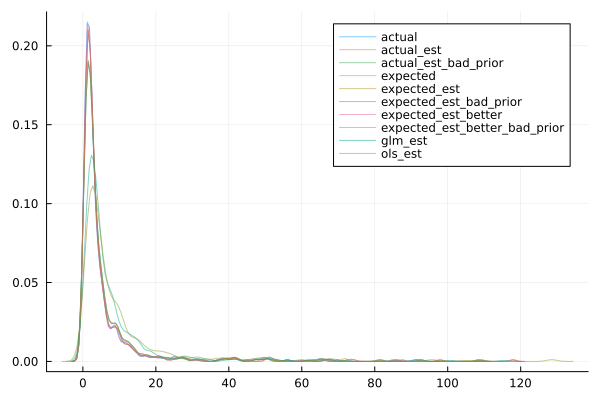

In [52]:
df_plot = stack(df, 1:10)
df_plot = df_plot[.!isnan.(df_plot[:, :value]), :]

density(df_plot[:, :value] / 1000, group = df_plot[:, :variable], linealpha = 0.5)

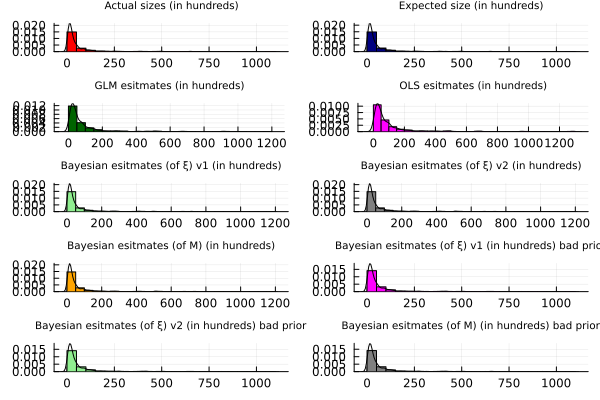

In [54]:
p1  = histogram(df[.!isnan.(df[:, 1]), 1] / 100, normalize = true, legend = false, colour = :red, title = "Actual sizes (in hundreds)", titlefontsize = 7, bins = 30)
density!(df[.!isnan.(df[:, 1]), 1] / 100, legend = false, colour = :black)

p2  = histogram(df[.!isnan.(df[:, 2]), 2] / 100, normalize = true, legend = false, title = "Expected size (in hundreds)", colour = :navy, titlefontsize = 7, bins = 30)
density!(df[.!isnan.(df[:, 2]), 2] / 100, legend = false, colour = :black)

p3  = histogram(df[.!isnan.(df[:, 3]), 3] / 100, normalize = true, legend = false, title = "GLM esitmates (in hundreds)", colour = :darkgreen, titlefontsize = 7, bins = 30)
density!(df[.!isnan.(df[:, 3]), 3] / 100, legend = false, colour = :black)

p4  = histogram(df[.!isnan.(df[:, 4]), 4] / 100, normalize = true, legend = false, title = "OLS esitmates (in hundreds)", colour = :magenta, titlefontsize = 7, bins = 30)
density!(df[.!isnan.(df[:, 4]), 4] / 100, legend = false, colour = :black)

p5  = histogram(df[.!isnan.(df[:, 5]), 5] / 100, normalize = true, legend = false, title = "Bayesian esitmates (of ξ) v1 (in hundreds)", colour = :lightgreen, titlefontsize = 7, bins = 30)
density!(df[.!isnan.(df[:, 5]), 5] / 100, legend = false, colour = :black)

p6  = histogram(df[.!isnan.(df[:, 6]), 6] / 100, normalize = true, legend = false, title = "Bayesian esitmates (of ξ) v2 (in hundreds)", colour = :gray, titlefontsize = 7, bins = 30)
density!(df[.!isnan.(df[:, 6]), 6] / 100, legend = false, colour = :black)

p7  = histogram(df[.!isnan.(df[:, 7]), 7] / 100, normalize = true, legend = false, title = "Bayesian esitmates (of M) (in hundreds)", colour = :orange, titlefontsize = 7, bins = 30)
density!(df[.!isnan.(df[:, 7]), 7] / 100, legend = false, colour = :black)

p8  = histogram(df[.!isnan.(df[:, 8]), 8] / 100, normalize = true, legend = false, title = "Bayesian esitmates (of ξ) v1 (in hundreds) bad prior", colour = :magenta, titlefontsize = 7, bins = 30)
density!(df[.!isnan.(df[:, 8]), 8] / 100, legend = false, colour = :black)

p9  = histogram(df[.!isnan.(df[:, 9]), 9] / 100, normalize = true, legend = false, title = "Bayesian esitmates (of ξ) v2 (in hundreds) bad prior", colour = :lightgreen, titlefontsize = 7, bins = 30)
density!(df[.!isnan.(df[:, 9]), 9] / 100, legend = false, colour = :black)

p10 = histogram(df[.!isnan.(df[:,10]),10] / 100, normalize = true, legend = false, title = "Bayesian esitmates (of M) (in hundreds) bad prior", colour = :gray, titlefontsize = 7, bins = 30)
density!(df[.!isnan.(df[:,10]),10] / 100, legend = false, colour = :black)

plot(
    layout = [2, 2, 2, 2, 2],
    p1, p2, p3, p4, p5, p6, p7, p8, p9, p10
)

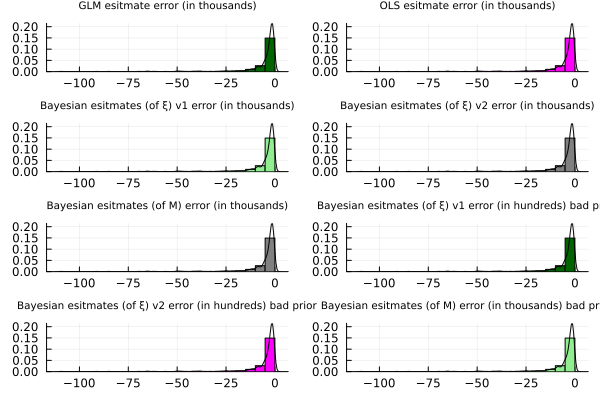

In [55]:
p1 = histogram((.!isnan.(df[:, 3]) - df[:, 1]) / 1000, normalize = true, legend = false, title = "GLM esitmate error (in thousands)", colour = :darkgreen, titlefontsize = 7, bins = 30)
density!((.!isnan.(df[:, 3]) - df[:, 1]) / 1000, legend = false, colour = :black)

p2 = histogram((.!isnan.(df[:, 4]) - df[:, 1]) / 1000, normalize = true, legend = false, title = "OLS esitmate error (in thousands)", colour = :magenta, titlefontsize = 7, bins = 30)
density!((.!isnan.(df[:, 4]) - df[:, 1]) / 1000, legend = false, colour = :black)

p3 = histogram((.!isnan.(df[:, 5]) - df[:, 1]) / 1000, normalize = true, legend = false, title = "Bayesian esitmates (of ξ) v1 error (in thousands)", colour = :lightgreen, titlefontsize = 7, bins = 30)
density!((.!isnan.(df[:, 5]) - df[:, 1]) / 1000, legend = false, colour = :black)

p4 = histogram((.!isnan.(df[:, 6]) - df[:, 1]) / 1000, normalize = true, legend = false, title = "Bayesian esitmates (of ξ) v2 error (in thousands)", colour = :gray, titlefontsize = 7, bins = 30)
density!((.!isnan.(df[:, 6]) - df[:, 1]) / 1000, legend = false, colour = :black)

p5 = histogram((.!isnan.(df[:, 7]) - df[:, 1]) / 1000, normalize = true, legend = false, title = "Bayesian esitmates (of M) error (in thousands)", colour = :gray, titlefontsize = 7, bins = 30)
density!((.!isnan.(df[:, 7]) - df[:, 1]) / 1000, legend = false, colour = :black)

p6 = histogram((.!isnan.(df[:, 8]) - df[:, 1]) / 1000, normalize = true, legend = false, title = "Bayesian esitmates (of ξ) v1 error (in hundreds) bad prior", colour = :darkgreen, titlefontsize = 7, bins = 30)
density!((.!isnan.(df[:, 8]) - df[:, 1]) / 1000, legend = false, colour = :black)

p7 = histogram((.!isnan.(df[:, 9]) - df[:, 1]) / 1000, normalize = true, legend = false, title = "Bayesian esitmates (of ξ) v2 error (in hundreds) bad prior", colour = :magenta, titlefontsize = 7, bins = 30)
density!((.!isnan.(df[:, 9]) - df[:, 1]) / 1000, legend = false, colour = :black)

p8 = histogram((.!isnan.(df[:,10]) - df[:, 1]) / 1000, normalize = true, legend = false, title = "Bayesian esitmates (of M) error (in thousands) bad prior", colour = :lightgreen, titlefontsize = 7, bins = 30)
density!((.!isnan.(df[:,10]) - df[:, 1]) / 1000, legend = false, colour = :black)

plot(
    p1, p2, p3, p4, p5, p6, p7, p8, 
    layout = [2, 2, 2, 2]
)